In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = "marketing_campaign.csv"
data = pd.read_csv(file_path, sep="\t")  # Adjust delimiter if necessary

# Display the first few rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
data['Income'] = data['Income'].fillna(data['Income'].mean())      

In [9]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [14]:
important_columns = [
    'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'Response'
]

# Create a new dataset with the selected columns
clustering_data = data[important_columns]

# Display the first few rows of the new dataset
print(clustering_data.head())

# Save the filtered dataset (optional)
clustering_data.to_csv("filtered_clustering_data.csv", index=False)
print("Filtered dataset saved as filtered_clustering_data.csv")

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \

In [15]:
clustering_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0


In [25]:
data = clustering_data.rename(columns={
    'MntWines': 'wine',
    'MntFruits': 'fruits',
    'MntMeatProducts': 'meat',
    'MntFishProducts': 'fish',
    'MntSweetProducts': 'sweet',
    'MntGoldProds': 'gold',
    'NumDealsPurchases': 'deals_purchase',
    'NumCatalogPurchases': 'catalog_purchase',
    'NumStorePurchases': 'store_purchase',
    'income': 'annual_income'
    
})

# Merge 'NumWebVisitsMonth' and 'NumWebPurchases' into 'web_purchase'
data['web_purchase'] = clustering_data['NumWebVisitsMonth'] + clustering_data['NumWebPurchases']

# Drop the original columns after merging (optional)
data = data.drop(columns=['NumWebVisitsMonth', 'NumWebPurchases'])

In [43]:
data.head()

,kidhome,teenhome,recency,wine,fruits,meat,fish,sweet,gold,deals_purchase,catalog_purchase,store_purchase,response,web_purchase,income,score,annual_income,spending
0,0,0,58,635,88,546,172,88,88,3,10,4,1,15,9.313558,1.0,58138.0,1617
1,1,1,38,11,1,6,2,1,6,2,1,2,0,6,7.575328,50.0,46344.0,27
2,0,0,26,426,49,127,111,21,42,1,2,10,0,12,11.299539,1.0,71613.0,776
3,1,0,26,11,4,20,10,3,5,2,0,4,0,8,4.672185,50.0,26646.0,53
4,1,0,94,173,43,118,46,27,15,5,3,6,0,10,9.336402,50.0,58293.0,422


In [42]:
data.columns = data.columns.str.lower()

In [44]:
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler(feature_range=(1,99))

data_scaler.fit(data)

TX=data_scaler.transform(data)
print(TX)

data['Income']=TX[:,-2]

data['Score']=TX[:,-1]

[[ 1.          1.         58.41414141 ...  1.          9.313558
  63.68888889]
 [50.         50.         38.61616162 ... 50.          7.57532755
   1.85555556]
 [ 1.          1.         26.73737374 ...  1.         11.2995386
  30.98333333]
 ...
 [ 1.          1.         91.08080808 ...  1.          9.14303632
  49.06666667]
 [ 1.         50.          8.91919192 ...  1.         10.95053659
  33.58888889]
 [50.         50.         40.5959596  ... 50.          8.53699905
   7.49444444]]


In [45]:
data.head()

,kidhome,teenhome,recency,wine,fruits,meat,fish,sweet,gold,deals_purchase,catalog_purchase,store_purchase,response,web_purchase,income,score,annual_income,spending,Income,Score
0,0,0,58,635,88,546,172,88,88,3,10,4,1,15,9.313558,1.0,58138.0,1617,9.313558,63.688889
1,1,1,38,11,1,6,2,1,6,2,1,2,0,6,7.575328,50.0,46344.0,27,7.575328,1.855556
2,0,0,26,426,49,127,111,21,42,1,2,10,0,12,11.299539,1.0,71613.0,776,11.299539,30.983333
3,1,0,26,11,4,20,10,3,5,2,0,4,0,8,4.672185,50.0,26646.0,53,4.672185,2.866667
4,1,0,94,173,43,118,46,27,15,5,3,6,0,10,9.336402,50.0,58293.0,422,9.336402,17.216667


In [46]:
data = data.drop(['income', 'score'], axis=1)

In [47]:
data.head()

,kidhome,teenhome,recency,wine,fruits,meat,fish,sweet,gold,deals_purchase,catalog_purchase,store_purchase,response,web_purchase,annual_income,spending,Income,Score
0,0,0,58,635,88,546,172,88,88,3,10,4,1,15,58138.0,1617,9.313558,63.688889
1,1,1,38,11,1,6,2,1,6,2,1,2,0,6,46344.0,27,7.575328,1.855556
2,0,0,26,426,49,127,111,21,42,1,2,10,0,12,71613.0,776,11.299539,30.983333
3,1,0,26,11,4,20,10,3,5,2,0,4,0,8,26646.0,53,4.672185,2.866667
4,1,0,94,173,43,118,46,27,15,5,3,6,0,10,58293.0,422,9.336402,17.216667


In [49]:
from sklearn.cluster import KMeans

X = data[['Income','Score']]

from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
max_silhouette_score=0
best_n_clusters=0
for n_clusters in range_n_clusters:

    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    
    silhouette_avg = silhouette_score(X, model.labels_)
    if silhouette_avg>max_silhouette_score:
        max_silhouette_score=silhouette_avg
        best_n_clusters=n_clusters
    print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    round(silhouette_avg,2),
    )
print("Best n_cluster= ",best_n_clusters, " with silhouette score= ", round(max_silhouette_score,2))

For n_clusters = 2 The average silhouette_score is : 0.68
For n_clusters = 3 The average silhouette_score is : 0.65
For n_clusters = 4 The average silhouette_score is : 0.61
For n_clusters = 5 The average silhouette_score is : 0.58
For n_clusters = 6 The average silhouette_score is : 0.58
For n_clusters = 7 The average silhouette_score is : 0.58
For n_clusters = 8 The average silhouette_score is : 0.57
Best n_cluster=  2  with silhouette score=  0.68


In [50]:
n_clusters=best_n_clusters
kmeans = KMeans(n_clusters=n_clusters,random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

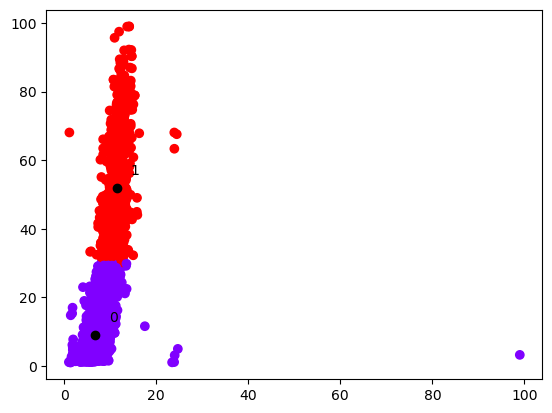

In [52]:
import matplotlib.pyplot as plt

X1 = X["Income"]

X2 = X["Score"]

plt.scatter(X1,X2, c=kmeans.labels_,  cmap='rainbow')

XCenters = kmeans.cluster_centers_[:,0]
YCenters = kmeans.cluster_centers_[:,1]

plt.scatter(XCenters ,YCenters, color='black')

for i in range(best_n_clusters):
    plt.annotate(
        i,
        xy=(XCenters[i], YCenters[i]), 
        textcoords='offset points',
        xytext=(10, 10))

plt.show()

In [57]:
file_path = "marketing_campaign.csv"
original_data = pd.read_csv(file_path, sep="\t")  # Adjust delimiter if necessary

# Display the first few rows
original_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [59]:
data['id'] = original_data['ID']

In [60]:
data.head()

,kidhome,teenhome,recency,wine,fruits,meat,fish,sweet,gold,deals_purchase,catalog_purchase,store_purchase,response,web_purchase,annual_income,spending,Income,Score,id
0,0,0,58,635,88,546,172,88,88,3,10,4,1,15,58138.0,1617,9.313558,63.688889,5524
1,1,1,38,11,1,6,2,1,6,2,1,2,0,6,46344.0,27,7.575328,1.855556,2174
2,0,0,26,426,49,127,111,21,42,1,2,10,0,12,71613.0,776,11.299539,30.983333,4141
3,1,0,26,11,4,20,10,3,5,2,0,4,0,8,26646.0,53,4.672185,2.866667,6182
4,1,0,94,173,43,118,46,27,15,5,3,6,0,10,58293.0,422,9.336402,17.216667,5324


In [64]:
data['Score'].mean()

24.364375

In [65]:
cluster_map = pd.DataFrame()
cluster_map['CustomerID'] = data['id']

cluster_map['cluster'] = data['Score']

cluster_map[cluster_map.cluster > 24.364375]

,CustomerID,cluster
0,5524,63.688889
2,4141,30.983333
5,7446,28.650000
12,2125,43.661111
15,2114,51.944444
...,...,...
2228,8720,66.100000
2231,9817,41.600000
2235,10870,52.955556
2237,7270,49.066667


In [67]:
cluster_map = pd.DataFrame()
cluster_map['CustomerID'] = data['id']

cluster_map['cluster'] = data['spending']

cluster_map[cluster_map.cluster > 1000]

,CustomerID,cluster
0,5524,1617
12,2125,1102
15,2114,1315
18,6565,1782
21,5376,1730
...,...,...
2221,7366,1438
2228,8720,1679
2231,9817,1049
2235,10870,1341


In [70]:
data.to_json('Customer_Clustering.json', orient='records', lines=True)

In [74]:
data.to_csv('Customer_Clustering.csv', index=False, encoding='utf-8')

In [77]:
# classify by hierarchy

from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X, method='single', metric='euclidean')
Z2 = linkage(X, method='complete', metric='euclidean')
Z3 = linkage(X, method='average', metric='euclidean')
Z4 = linkage(X, method='ward', metric='euclidean')

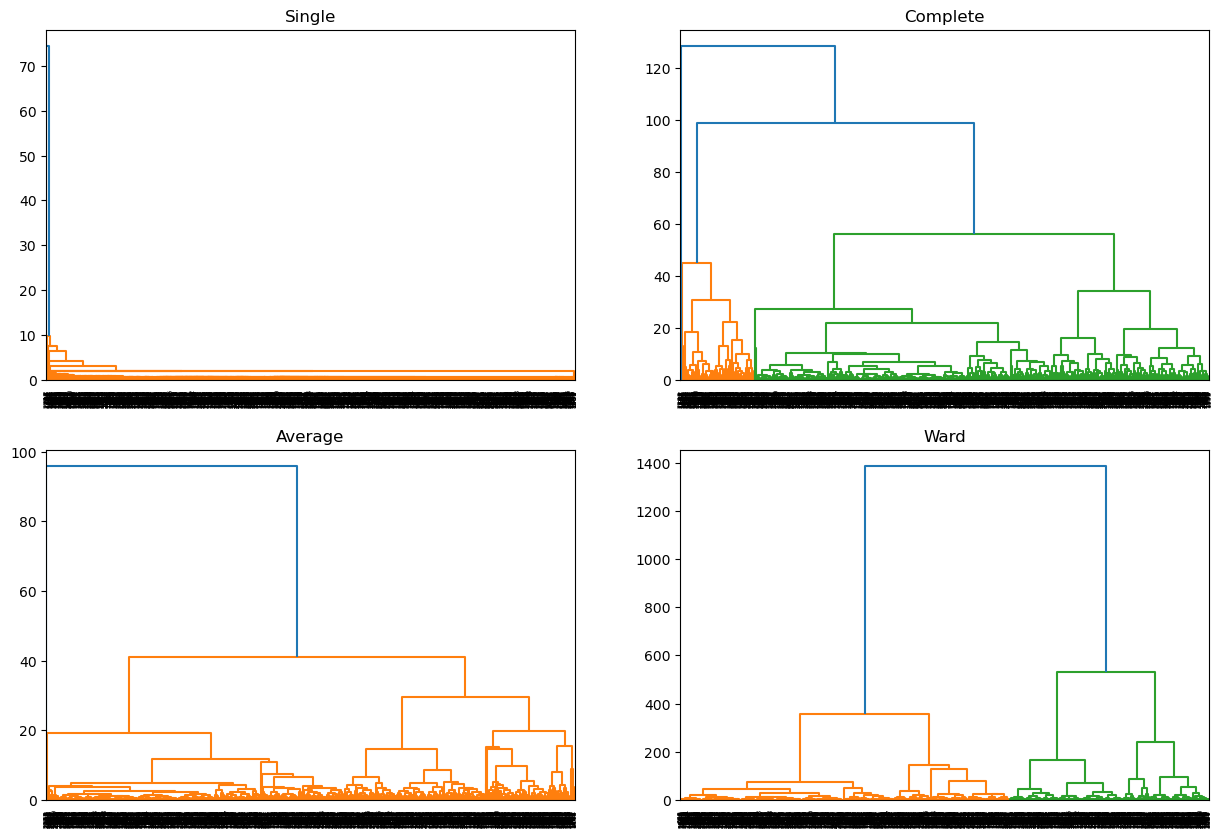

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')

plt.show()

In [79]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=5, linkage='ward')

Z1.fit_predict(X)

print(Z1.labels_)

[2 3 0 ... 0 0 3]


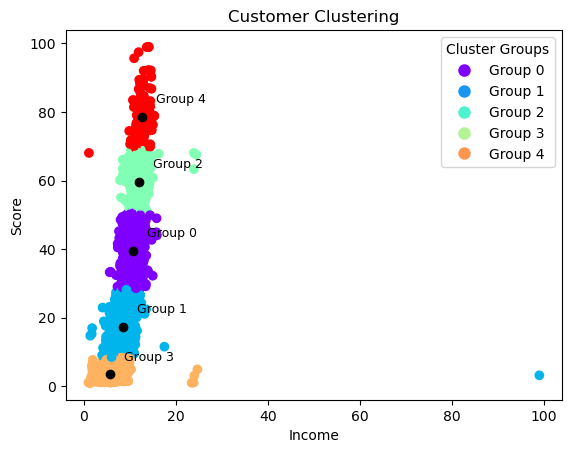

In [90]:
x = data["Income"]
y = data["Score"]

# Scatter plot with colors based on cluster labels
plt.scatter(x, y, c=Z1.labels_, cmap='rainbow')

# Calculate centroid of each group and annotate it
unique_labels = np.unique(Z1.labels_)
centroids = []
for label in unique_labels:
    centroid = np.mean(np.array([x[Z1.labels_ == label], y[Z1.labels_ == label]]).T, axis=0)
    centroids.append(centroid)

    # Plot the centroid
    plt.scatter(centroid[0], centroid[1], color='black')
    
    # Annotate centroid with the label
    plt.annotate(
        f'Group {label}',  # Displaying the group number (label)
        xy=centroid,
        textcoords='offset points',
        xytext=(10, 10),  # Offset annotation
        fontsize=9
    )

# Create a legend based on unique cluster labels
handles = []
for i, label in enumerate(unique_labels):
    handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.rainbow(i / len(unique_labels)), markersize=10, label=f'Group {label}')
    handles.append(handle)

# Add the legend
plt.legend(handles=handles, title="Cluster Groups")

plt.title('Customer Clustering')
plt.xlabel('Income')
plt.ylabel('Score')
plt.show()

In [87]:
cluster_map = pd.DataFrame()
cluster_map['CustomerID'] = data['id']

cluster_map['cluster'] = data['spending']

cluster_map[cluster_map.cluster > 1000]

,CustomerID,cluster
0,5524,1617
12,2125,1102
15,2114,1315
18,6565,1782
21,5376,1730
...,...,...
2221,7366,1438
2228,8720,1679
2231,9817,1049
2235,10870,1341


In [91]:
data.to_csv('Customer_Clustering.csv', index=False, encoding='utf-8')

In [92]:
data.to_json('Customer_Clustering.json', orient='records', lines=True)